# Part II - Prosper Rating
## by Bethany Goss

## Investigation Overview

I will be looking specifically at Prosper Rating which is a unique part of Prosper's lending model. This is part of a risk "Prosper Score" given to borrowers based on past borrowers' behavior. The Prosper Rating is on a scale of 1- 11 with 1 being the worst and 11 being the best.

This will be a discussion of indicators that are not reflected in a credit report that could impact the Prosper Rating such as a borrower's debt to income ratio, as well as a loan's estimated effective yield. I expect that a loan's estimated effective yield will have the most significant impact on Prosper Rating. 

## Dataset Overview

I am taking a look at a portion of Prosper's loan portfolio. This particular portion has 113,937 loans in it and has information ranging from application data to current payment status. https://knowledge.udacity.com/questions/693819
Base on this link, I'll be lookin at mid July 2009 to the end of the dataset in March 2014. 

After the dataset has been addressed, there are 84,113 loans with 80 different characteristics ranging from loan number to open credit lines when credit for the loan was first pulled.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans_d=pd.read_csv("prosperLoanData.csv")
loans_d.sort_values(by=['LoanOriginationDate'], ignore_index=True, inplace=True)
loans_d=loans_d.iloc[28953:]
m_data=loans_d.copy()
m_data.reset_index(drop=True, inplace=True)
#handling the prosper rating nullls & making sure that the Prosper Ratings match
m_data["ProsperRating (numeric)"].value_counts(), m_data["ProsperRating (Alpha)"].value_counts()
m_data.rename(columns={'ProsperRating (numeric)': 'ProsperRating', 'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)
m_data.drop(labels=["ProsperRating (Alpha)"], axis=1, inplace=True)
m_data.ProsperRating.fillna(0.0, inplace=True)
#handling there DTI and Estimated Effective Yield nulls
m_data.DebtToIncomeRatio.isnull().sum()/m_data.shape[0] #8.5% of the dataset is null. I will fill in with the mean
m_data.EstimatedEffectiveYield.isnull().sum()/m_data.shape[0] # 0.16% of the dataset is null. I will fill in with the mean
def filling_means(column):
    dtimean=m_data.DebtToIncomeRatio.mean()
    column.fillna(dtimean, inplace=True)
    return column.isnull().sum()
filling_means(m_data.DebtToIncomeRatio)
filling_means(m_data.EstimatedEffectiveYield)

0

## Overall Prosper Ratings

If you arrow down to the next slide, you can see that there aren't any loans that qualify for any of the 8-11 ratings. This could be a side effect of the relationship between Estimated Effective Yield and Prosper Rating. 

Since Prosper Rating 0.0 is less than .2% of the dataset, it will no be considered. As you will see, it sits as an outlier in the plots. Likely due to the few loans with this rating. 


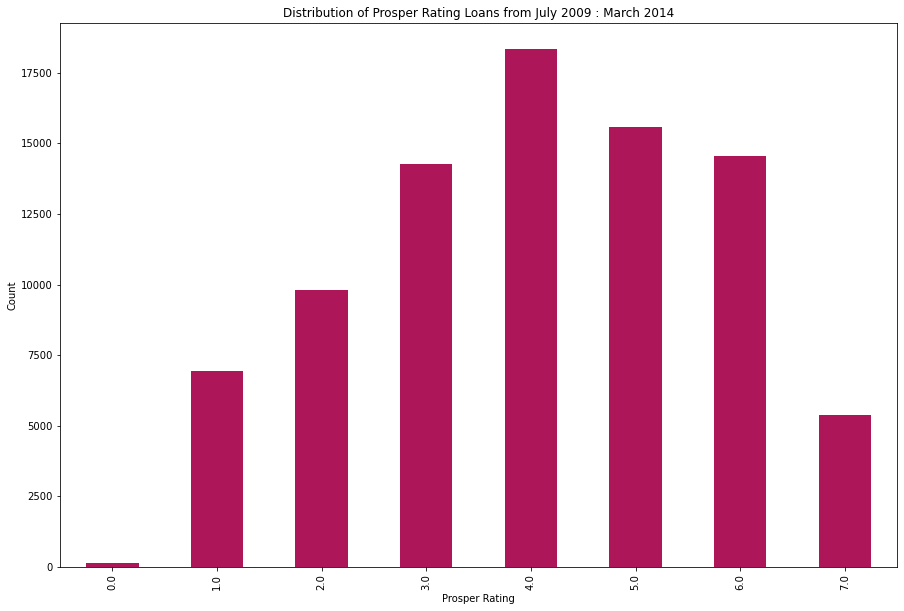

In [3]:
#distribution of prosper rating 
plt.figure(figsize = [15, 10])
m_data.ProsperRating.value_counts().sort_index().plot.bar(color=sb.color_palette(palette="rocket_r")[3])
plt.xlabel("Prosper Rating")
plt.ylabel("Count")
plt.title("Distribution of Prosper Rating Loans from July 2009 : March 2014");

## Correlation  for Prosper Rating

The below graph will show a heatmap indicating the strength of the studied factors compared to Prosper Rating. As you will see, Estimated Effective Yield has the strongest relationship with Prosper Rating and a negative one. 

When you look at the variables overall, the next strongest relationships are between Estimated Effective Rate and two others: Debt to Income Ratio and Listing/Loan Category, yet these correlate positively. We will examine these factors next.  

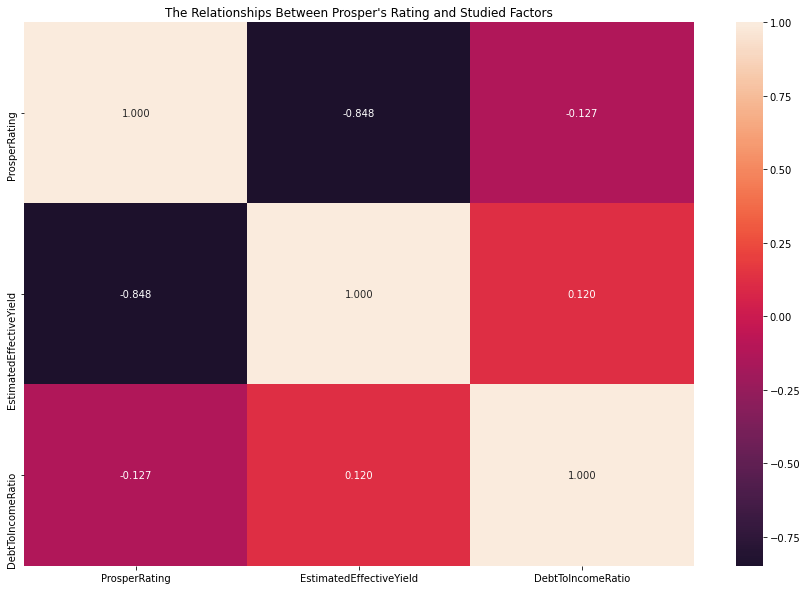

In [4]:
# Correlation plot of the numerical variables.
numeric_vars = ['ProsperRating', 'EstimatedEffectiveYield', 'DebtToIncomeRatio']
plt.figure(figsize = [15, 10])
sb.heatmap(m_data[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'rocket', center = 0)
plt.title("The Relationships Between Prosper's Rating and Studied Factors");

## Looking at DTI and Estimated Effective Yield while Considering Prosper Rating

From this graph, we can see Prosper Rating's relationship with Estimated Effective Yield - note how the colors are disbursed throughout the graph. This affirms the range of Yield and its negative relationship with Rating, disregarding Rating 0.0. 

Debt to Income Ratio and Estimated Effective yield show concentrations in the same percentages for most of the graph. 

There is still a downward trend when looking at Estimated Effective Yield and Prosper Rating, but the relatioship does not appear as strong when taking Debt to Income Ratio into account.

In [5]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0.00, 0.31 +0.1, 0.1)
    bins_y = np.arange(-0.2, 0.31+0.1, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    #plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks)
    #plt.yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])),
               #[500, '1k', '2k', '5k', '10k', '20k'])

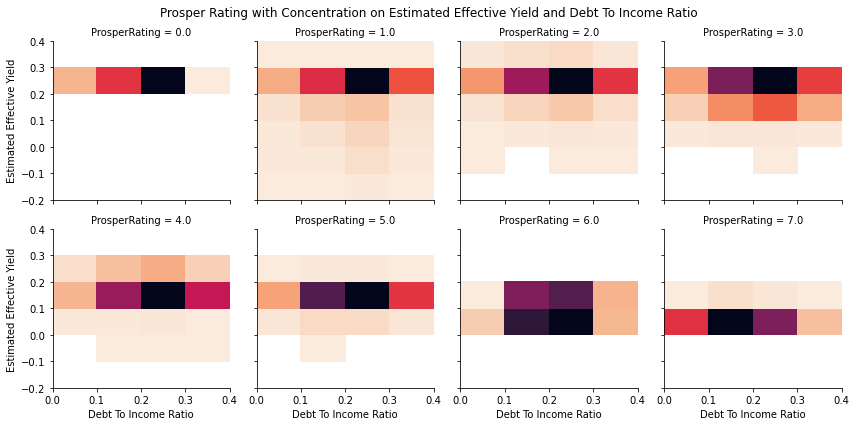

In [6]:

# create faceted heat maps on levels of the cut variable
graph2 = sb.FacetGrid(data = m_data, col = 'ProsperRating', col_wrap = 4, height = 3)
graph2.map(hist2dgrid, 'DebtToIncomeRatio', 'EstimatedEffectiveYield', color = 'rocket_r')
graph2.set_xlabels('Debt To Income Ratio')
graph2.set_ylabels('Estimated Effective Yield')
graph2.fig.subplots_adjust(top=0.9)
graph2.fig.suptitle("Prosper Rating with Concentration on Estimated Effective Yield and Debt To Income Ratio");

## The Relationship between Estimated Effective Yield and Prosper Rating

Since Debt To Income Ratio has minimal impact on the relationship between Estimated Effective Yield and Prosper Rating, here is a closer look at that main relationship. As you will see when you arrow down, Estimated Effective Yield trends negatively as Prosper Rating increases. The "tails" on the shown plot decrease with Rating as well. This means that the Estimated Effective Yield varies less as Prosper Rating increases. 

The bulk of the "violin" in Prosper Rating 1.0 for Yield is around the maximum, 0.32, in this dataset. This shows despite the likelihood of getting a negative Yield is higher in this Rating than in the others, it could prove more lucrative to approve borrowers with this Rating.   

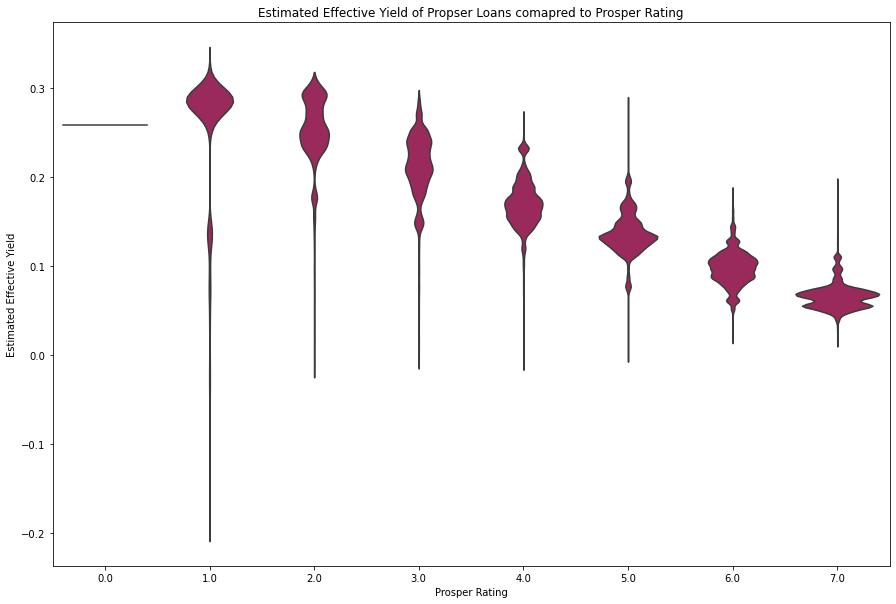

In [7]:
plt.figure(figsize = [15, 10])
sb.violinplot(x=m_data.ProsperRating, y=m_data.EstimatedEffectiveYield, inner=None, color=sb.color_palette(palette="rocket_r")[3])
plt.title("Estimated Effective Yield of Propser Loans comapred to Prosper Rating")
plt.xlabel('Prosper Rating')
plt.ylabel("Estimated Effective Yield");

In [ ]:
!jupyter nbconvert Part_II_Prosper_Rating_Bethany_Goss.ipynb --to slides --post serve --no-input --no-prompt